####Installing the data

In [1]:
!pip install kaggle
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

 97% 416M/428M [00:03<00:00, 134MB/s]
100% 428M/428M [00:03<00:00, 133MB/s]


In [4]:
#kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

In [5]:
! unzip -q /content/toronto-emotional-speech-set-tess.zip

In [6]:
import numpy as np
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from IPython.display import Audio
import os

#### Fear

In [7]:
paths= []
labels=[]
for dirname,_,filename in os.walk("/content/TESS Toronto emotional speech set data/OAF_Fear"):
  #print("dirname: ",dirname)
  #print("_",_)
  #print("filename:",filename)
  for filename in filename:
    paths.append(os.path.join(dirname,filename))
    label = dirname.split("/")[-1]
    #print("label",label)
    #print("paths",paths)
    labels.append(label.lower())
print("Data-set is LOADED !!!")


Data-set is LOADED !!!


In [8]:
#/content/TESS Toronto emotional speech set data/YAF_fear
paths_1= []
labels_1=[]
for dirname,_,filename in os.walk("/content/TESS Toronto emotional speech set data/YAF_fear"):
  #print("dirname: ",dirname)
  #print("_",_)
  #print("filename:",filename)
  for filename in filename:
    paths_1.append(os.path.join(dirname,filename))
    label = dirname.split("/")[-1]
    #print("label",label)
    #print("paths",paths)
    labels_1.append(label.lower())
print("Data-set is LOADED !!!")


Data-set is LOADED !!!


In [9]:
df_fear = pd.DataFrame()
df_fear["Speech"] = paths + paths_1
df_fear["label"] = labels + labels_1
df_fear.head()

,Speech,label
0,/content/TESS Toronto emotional speech set dat...,oaf_fear
1,/content/TESS Toronto emotional speech set dat...,oaf_fear
2,/content/TESS Toronto emotional speech set dat...,oaf_fear
3,/content/TESS Toronto emotional speech set dat...,oaf_fear
4,/content/TESS Toronto emotional speech set dat...,oaf_fear


In [10]:
df_fear["label"].value_counts()

label
oaf_fear    200
yaf_fear    200
Name: count, dtype: int64

In [11]:
df_fear["label"] = df_fear["label"].replace({"oaf_fear":"fear","yaf_fear":"fear"})
df_fear["label"].value_counts()

label
fear    400
Name: count, dtype: int64

In [12]:
df_fear.head()

,Speech,label
0,/content/TESS Toronto emotional speech set dat...,fear
1,/content/TESS Toronto emotional speech set dat...,fear
2,/content/TESS Toronto emotional speech set dat...,fear
3,/content/TESS Toronto emotional speech set dat...,fear
4,/content/TESS Toronto emotional speech set dat...,fear


#### Anger

In [13]:
#/content/TESS Toronto emotional speech set data/YAF_fear
paths_a1= []
labels_a1=[]
for dirname,_,filename in os.walk("/content/TESS Toronto emotional speech set data/OAF_angry"):
  #print("dirname: ",dirname)
  #print("_",_)
  #print("filename:",filename)
  for filename in filename:
    paths_a1.append(os.path.join(dirname,filename))
    label = dirname.split("/")[-1]
    #print("label",label)
    #print("paths",paths)
    labels_a1.append(label.lower())
print("Data-set is LOADED !!!")


Data-set is LOADED !!!


In [14]:
#/content/TESS Toronto emotional speech set data/YAF_fear
paths_a2= []
labels_a2=[]
for dirname,_,filename in os.walk("/content/TESS Toronto emotional speech set data/YAF_angry"):
  #print("dirname: ",dirname)
  #print("_",_)
  #print("filename:",filename)
  for filename in filename:
    paths_a2.append(os.path.join(dirname,filename))
    label = dirname.split("/")[-1]
    #print("label",label)
    #print("paths",paths)
    labels_a2.append(label.lower())
print("Data-set is LOADED !!!")


Data-set is LOADED !!!


In [15]:
df_anger = pd.DataFrame()
df_anger["Speech"] = paths_a1 + paths_a2
df_anger["label"] = labels_a1 + labels_a2
df_anger.head()

,Speech,label
0,/content/TESS Toronto emotional speech set dat...,oaf_angry
1,/content/TESS Toronto emotional speech set dat...,oaf_angry
2,/content/TESS Toronto emotional speech set dat...,oaf_angry
3,/content/TESS Toronto emotional speech set dat...,oaf_angry
4,/content/TESS Toronto emotional speech set dat...,oaf_angry


In [16]:
df_anger["label"].value_counts()

label
oaf_angry    200
yaf_angry    200
Name: count, dtype: int64

In [17]:
df_anger["label"]=df_anger["label"].replace({"oaf_angry":"angry", "yaf_angry":"angry"})
df_anger.head()

,Speech,label
0,/content/TESS Toronto emotional speech set dat...,angry
1,/content/TESS Toronto emotional speech set dat...,angry
2,/content/TESS Toronto emotional speech set dat...,angry
3,/content/TESS Toronto emotional speech set dat...,angry
4,/content/TESS Toronto emotional speech set dat...,angry


In [18]:
df_anger["label"].value_counts()

label
angry    400
Name: count, dtype: int64

#### Happy

In [19]:
#/content/TESS Toronto emotional speech set data/YAF_fear
paths_h1= []
labels_h1=[]
for dirname,_,filename in os.walk("/content/TESS Toronto emotional speech set data/OAF_happy"):
  #print("dirname: ",dirname)
  #print("_",_)
  #print("filename:",filename)
  for filename in filename:
    paths_h1.append(os.path.join(dirname,filename))
    label = dirname.split("/")[-1]
    #print("label",label)
    #print("paths",paths)
    labels_h1.append(label.lower())
print("Data-set is LOADED !!!")

Data-set is LOADED !!!


In [20]:
#/content/TESS Toronto emotional speech set data/YAF_fear
paths_h2= []
labels_h2=[]
for dirname,_,filename in os.walk("/content/TESS Toronto emotional speech set data/YAF_happy"):
  #print("dirname: ",dirname)
  #print("_",_)
  #print("filename:",filename)
  for filename in filename:
    paths_h2.append(os.path.join(dirname,filename))
    label = dirname.split("/")[-1]
    #print("label",label)
    #print("paths",paths)
    labels_h2.append(label.lower())
print("Data-set is LOADED !!!")

Data-set is LOADED !!!


In [21]:
df_happy = pd.DataFrame()
df_happy["Speech"] = paths_h1 + paths_h2
df_happy["label"] = labels_h1 + labels_h2
df_happy["label"]=df_happy["label"].replace({"yaf_happy":"happy","oaf_happy":"happy"})
df_happy.head()

,Speech,label
0,/content/TESS Toronto emotional speech set dat...,happy
1,/content/TESS Toronto emotional speech set dat...,happy
2,/content/TESS Toronto emotional speech set dat...,happy
3,/content/TESS Toronto emotional speech set dat...,happy
4,/content/TESS Toronto emotional speech set dat...,happy


In [22]:
df_happy["label"].value_counts()

label
happy    400
Name: count, dtype: int64

#### SAD

In [23]:
#/content/TESS Toronto emotional speech set data/YAF_fear
paths_sa1= []
labels_sa1=[]
for dirname,_,filename in os.walk("/content/TESS Toronto emotional speech set data/YAF_sad"):
  #print("dirname: ",dirname)
  #print("_",_)
  #print("filename:",filename)
  for filename in filename:
    paths_sa1.append(os.path.join(dirname,filename))
    label = dirname.split("/")[-1]
    #print("label",label)
    #print("paths",paths)
    labels_sa1.append(label.lower())
print("Data-set is LOADED !!!")

Data-set is LOADED !!!


In [24]:
#/content/TESS Toronto emotional speech set data/YAF_fear
paths_sa2= []
labels_sa2=[]
for dirname,_,filename in os.walk("/content/TESS Toronto emotional speech set data/OAF_Sad"):
  #print("dirname: ",dirname)
  #print("_",_)
  #print("filename:",filename)
  for filename in filename:
    paths_sa2.append(os.path.join(dirname,filename))
    label = dirname.split("/")[-1]
    #print("label",label)
    #print("paths",paths)
    labels_sa2.append(label.lower())
print("Data-set is LOADED !!!")

Data-set is LOADED !!!


In [25]:
df_sad = pd.DataFrame()
df_sad["Speech"] = paths_sa1 + paths_sa2
df_sad["label"] = labels_sa1+labels_sa2
df_sad["label"].value_counts()

label
yaf_sad    200
oaf_sad    200
Name: count, dtype: int64

In [26]:
df_sad.head()

,Speech,label
0,/content/TESS Toronto emotional speech set dat...,yaf_sad
1,/content/TESS Toronto emotional speech set dat...,yaf_sad
2,/content/TESS Toronto emotional speech set dat...,yaf_sad
3,/content/TESS Toronto emotional speech set dat...,yaf_sad
4,/content/TESS Toronto emotional speech set dat...,yaf_sad


In [27]:
df_sad["label"]=df_sad["label"].replace({"yaf_sad":"sad","oaf_sad":"sad"})
df_sad.head()

,Speech,label
0,/content/TESS Toronto emotional speech set dat...,sad
1,/content/TESS Toronto emotional speech set dat...,sad
2,/content/TESS Toronto emotional speech set dat...,sad
3,/content/TESS Toronto emotional speech set dat...,sad
4,/content/TESS Toronto emotional speech set dat...,sad


In [28]:
df_sad["label"].value_counts()

label
sad    400
Name: count, dtype: int64

#### Disgust

In [29]:
#/content/TESS Toronto emotional speech set data/YAF_fear
paths_d1= []
labels_d1=[]
for dirname,_,filename in os.walk("/content/TESS Toronto emotional speech set data/OAF_disgust"):
  #print("dirname: ",dirname)
  #print("_",_)
  #print("filename:",filename)
  for filename in filename:
    paths_d1.append(os.path.join(dirname,filename))
    label = dirname.split("/")[-1]
    #print("label",label)
    #print("paths",paths)
    labels_d1.append(label.lower())
print("Data-set is LOADED !!!")

Data-set is LOADED !!!


In [30]:
#/content/TESS Toronto emotional speech set data/YAF_fear
paths_d2= []
labels_d2=[]
for dirname,_,filename in os.walk("/content/TESS Toronto emotional speech set data/YAF_disgust"):
  #print("dirname: ",dirname)
  #print("_",_)
  #print("filename:",filename)
  for filename in filename:
    paths_d2.append(os.path.join(dirname,filename))
    label = dirname.split("/")[-1]
    #print("label",label)
    #print("paths",paths)
    labels_d2.append(label.lower())
print("Data-set is LOADED !!!")

Data-set is LOADED !!!


In [31]:
df_disgust = pd.DataFrame()
df_disgust["Speech"] = paths_d1 + paths_d2
df_disgust["label"] = labels_d1 + labels_d2
df_disgust.head()

,Speech,label
0,/content/TESS Toronto emotional speech set dat...,oaf_disgust
1,/content/TESS Toronto emotional speech set dat...,oaf_disgust
2,/content/TESS Toronto emotional speech set dat...,oaf_disgust
3,/content/TESS Toronto emotional speech set dat...,oaf_disgust
4,/content/TESS Toronto emotional speech set dat...,oaf_disgust


In [32]:
df_disgust["label"] = df_disgust["label"].replace({"oaf_disgust": "disgust", "yaf_disgust":"disgust"})
df_disgust.head()

,Speech,label
0,/content/TESS Toronto emotional speech set dat...,disgust
1,/content/TESS Toronto emotional speech set dat...,disgust
2,/content/TESS Toronto emotional speech set dat...,disgust
3,/content/TESS Toronto emotional speech set dat...,disgust
4,/content/TESS Toronto emotional speech set dat...,disgust


In [33]:
df_disgust["label"].value_counts()

label
disgust    400
Name: count, dtype: int64

#### Pleasant Surprise

In [34]:
#/content/TESS Toronto emotional speech set data/YAF_fear
paths_ps1= []
labels_ps1=[]
for dirname,_,filename in os.walk("/content/TESS Toronto emotional speech set data/YAF_pleasant_surprised"):
  #print("dirname: ",dirname)
  #print("_",_)
  #print("filename:",filename)
  for filename in filename:
    paths_ps1.append(os.path.join(dirname,filename))
    label = dirname.split("/")[-1]
    #print("label",label)
    #print("paths",paths)
    labels_ps1.append(label.lower())
print("Data-set is LOADED !!!")

Data-set is LOADED !!!


In [35]:
#/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise
#/content/TESS Toronto emotional speech set data/YAF_fear
paths_ps2= []
labels_ps2=[]
for dirname,_,filename in os.walk("/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise"):
  #print("dirname: ",dirname)
  #print("_",_)
  #print("filename:",filename)
  for filename in filename:
    paths_ps2.append(os.path.join(dirname,filename))
    label = dirname.split("/")[-1]
    #print("label",label)
    #print("paths",paths)
    labels_ps2.append(label.lower())
print("Data-set is LOADED !!!")

Data-set is LOADED !!!


In [36]:
df_ps = pd.DataFrame()
df_ps["Speech"] = paths_ps1 + paths_ps2
df_ps["label"] = labels_ps1 + labels_ps2
df_ps.head()

,Speech,label
0,/content/TESS Toronto emotional speech set dat...,yaf_pleasant_surprised
1,/content/TESS Toronto emotional speech set dat...,yaf_pleasant_surprised
2,/content/TESS Toronto emotional speech set dat...,yaf_pleasant_surprised
3,/content/TESS Toronto emotional speech set dat...,yaf_pleasant_surprised
4,/content/TESS Toronto emotional speech set dat...,yaf_pleasant_surprised


In [37]:
df_ps["label"].value_counts()

label
yaf_pleasant_surprised    200
oaf_pleasant_surprise     200
Name: count, dtype: int64

In [38]:
df_ps["label"]=df_ps["label"].replace({"yaf_pleasant_surprised":"surprise","oaf_pleasant_surprise":"surprise"})

In [39]:
df_ps["label"].value_counts()

label
surprise    400
Name: count, dtype: int64

#### Neutral

In [40]:
#/content/TESS Toronto emotional speech set data/YAF_fear
paths_n1= []
labels_n1=[]
for dirname,_,filename in os.walk("/content/TESS Toronto emotional speech set data/YAF_neutral"):
  #print("dirname: ",dirname)
  #print("_",_)
  #print("filename:",filename)
  for filename in filename:
    paths_n1.append(os.path.join(dirname,filename))
    label = dirname.split("/")[-1]
    #print("label",label)
    #print("paths",paths)
    labels_n1.append(label.lower())
print("Data-set is LOADED !!!")

Data-set is LOADED !!!


In [41]:
#/content/TESS Toronto emotional speech set data/YAF_fear
paths_n2= []
labels_n2=[]
for dirname,_,filename in os.walk("/content/TESS Toronto emotional speech set data/OAF_neutral"):
  #print("dirname: ",dirname)
  #print("_",_)
  #print("filename:",filename)
  for filename in filename:
    paths_n2.append(os.path.join(dirname,filename))
    label = dirname.split("/")[-1]
    #print("label",label)
    #print("paths",paths)
    labels_n2.append(label.lower())
print("Data-set is LOADED !!!")

Data-set is LOADED !!!


In [42]:
df_neutral = pd.DataFrame()
df_neutral["Speech"] = paths_n1 + paths_n2
df_neutral["label"] = labels_n1 + labels_n2
df_neutral.head()

,Speech,label
0,/content/TESS Toronto emotional speech set dat...,yaf_neutral
1,/content/TESS Toronto emotional speech set dat...,yaf_neutral
2,/content/TESS Toronto emotional speech set dat...,yaf_neutral
3,/content/TESS Toronto emotional speech set dat...,yaf_neutral
4,/content/TESS Toronto emotional speech set dat...,yaf_neutral


In [43]:
df_neutral["label"] = df_neutral["label"].replace({"yaf_neutral":"neutral","oaf_neutral":"neutral"})
df_neutral["label"].value_counts()

label
neutral    400
Name: count, dtype: int64

#### Final Datta

In [44]:
Final_df = pd.concat([df_ps,df_anger,df_disgust,df_fear,df_happy,df_sad,df_neutral],ignore_index=True)
Final_df = Final_df.sample(frac = 1,random_state=2).reset_index(drop=True)#shuffling
Final_df.head()

,Speech,label
0,/content/TESS Toronto emotional speech set dat...,happy
1,/content/TESS Toronto emotional speech set dat...,surprise
2,/content/TESS Toronto emotional speech set dat...,fear
3,/content/TESS Toronto emotional speech set dat...,angry
4,/content/TESS Toronto emotional speech set dat...,fear


In [45]:
Final_df["label"].value_counts()

label
happy       400
surprise    400
fear        400
angry       400
sad         400
disgust     400
neutral     400
Name: count, dtype: int64

#### EXploratory Data Analysis (EDA)

<ipython-input-46-d100ea526c67>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "label",data = Final_df,palette = "colorblind")


<Axes: xlabel='label', ylabel='count'>

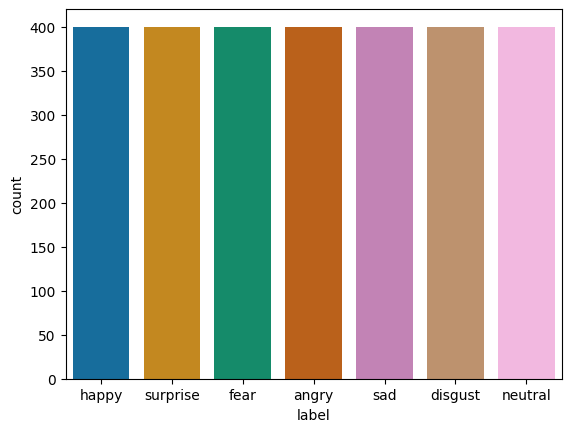

In [46]:
import seaborn as sns
sns.countplot(x = "label",data = Final_df,palette = "colorblind")

#### Waveform

In [47]:
def draw_waveform(data,sr,emotion):
  plt.figure(figsize=(10,6))
  plt.title(emotion,size=10)
  librosa.display.waveshow(data,sr=sr)
  plt.show()

#### Spectogram

In [48]:
def draw_spectogram(data,sr,emotion):
  mfccs = librosa.feature.mfcc(y=data,sr=sr)
  plt.figure(figsize=(12, 6))
  plt.title(emotion)
  librosa.display.specshow(mfccs, sr=sr, x_axis='time')
  plt.colorbar()
  plt.xlabel('Time')
  plt.ylabel('MFCC Coefficients')
  plt.tight_layout()
  plt.show()

#### Visualization of all the classes using waveforms and spectograms

<ipython-input-49-fc10dcfe7f98>:17: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram = librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(data), ref=np.max),


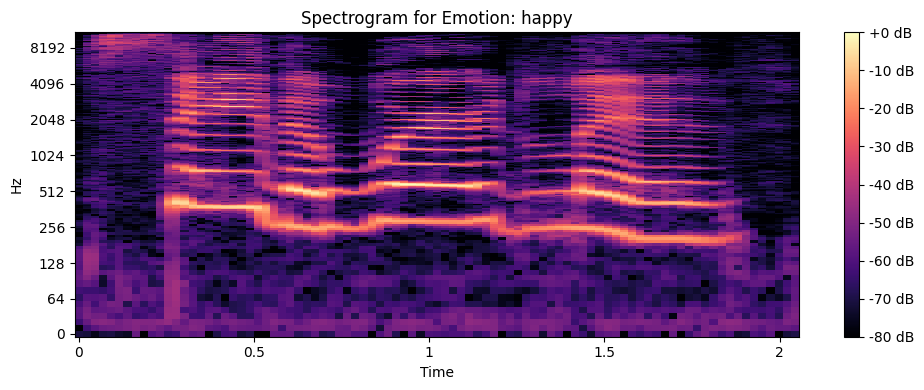

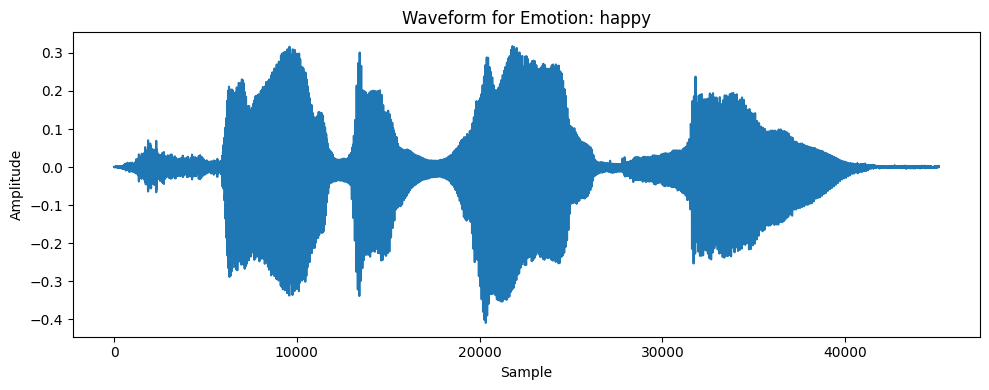

Emotion: happy


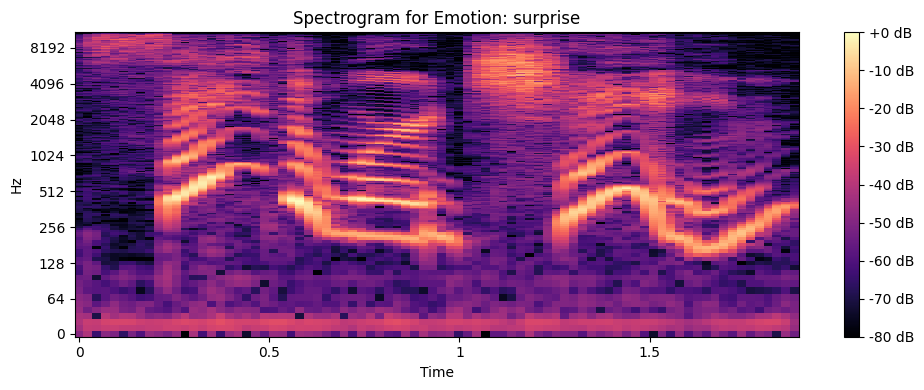

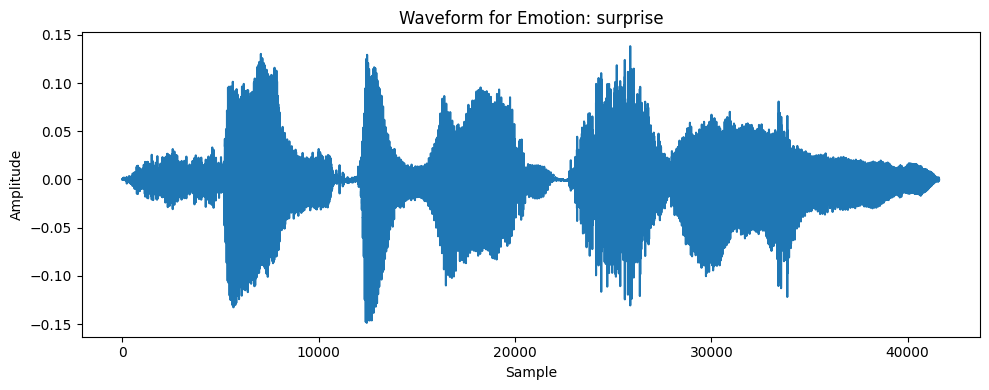

Emotion: surprise


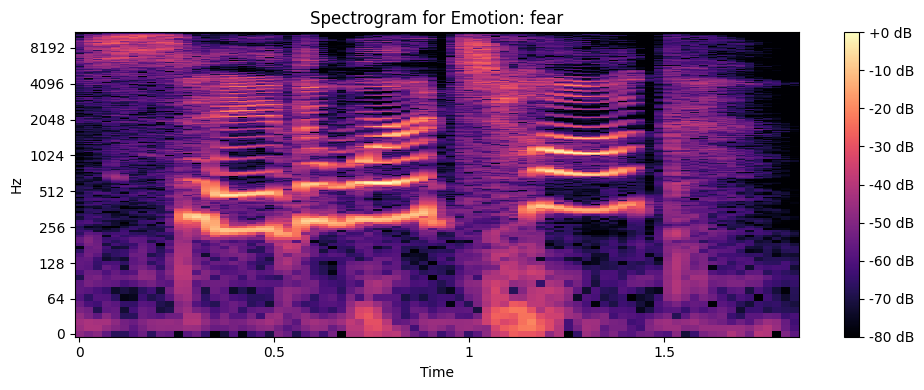

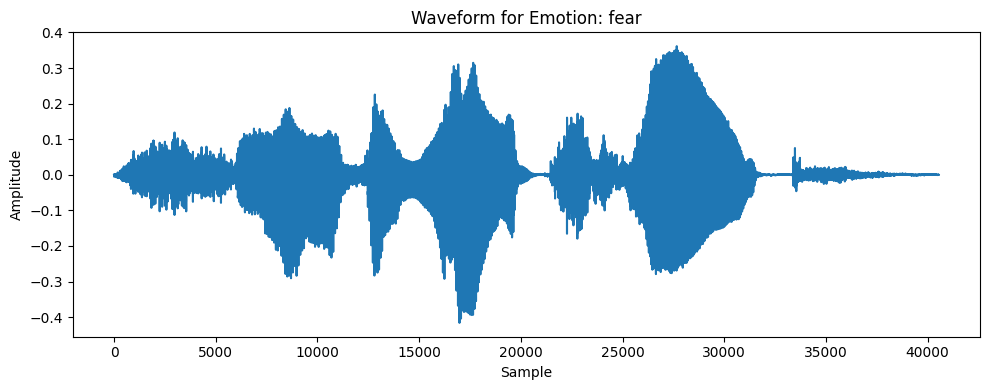

Emotion: fear


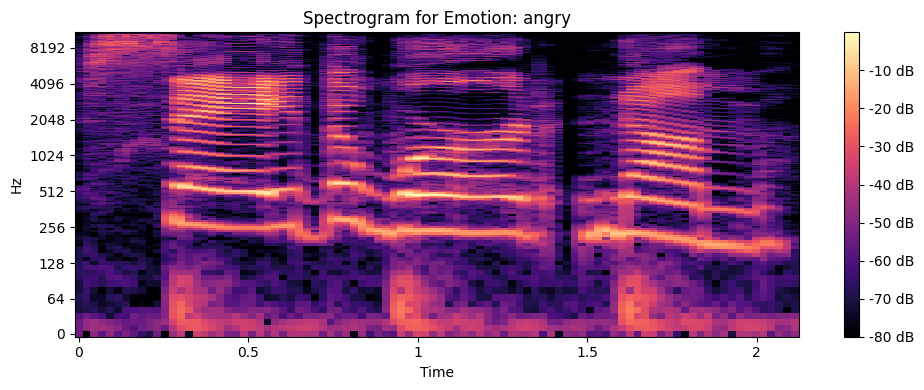

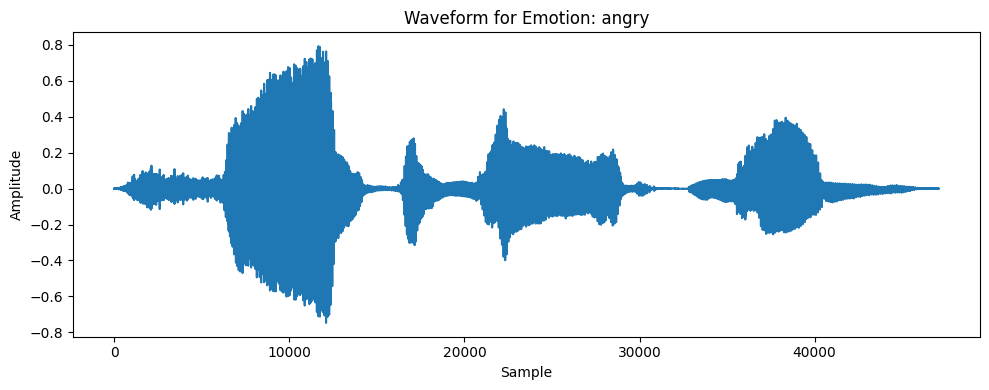

Emotion: angry


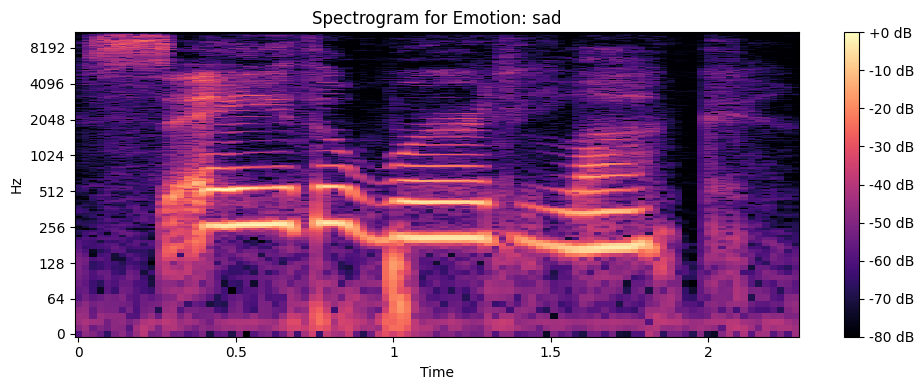

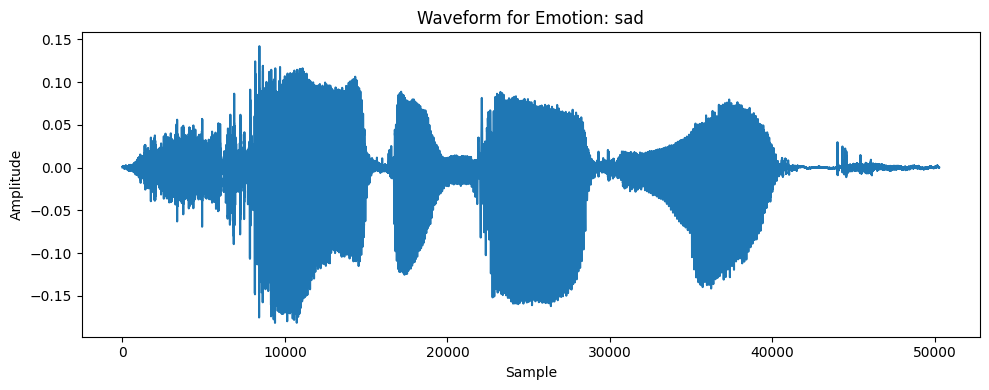

Emotion: sad


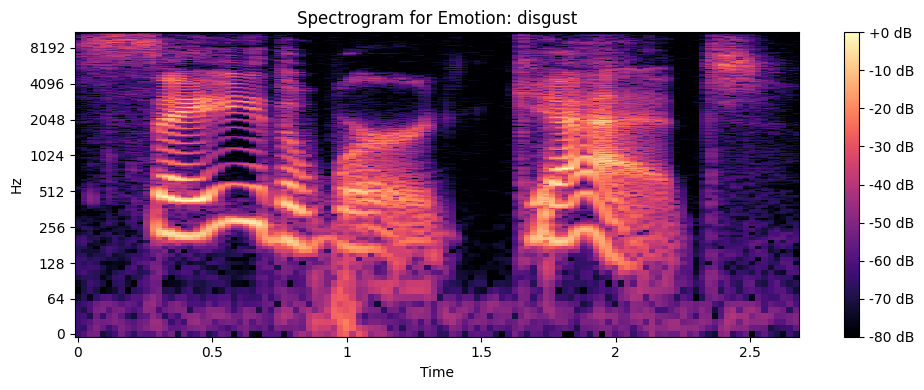

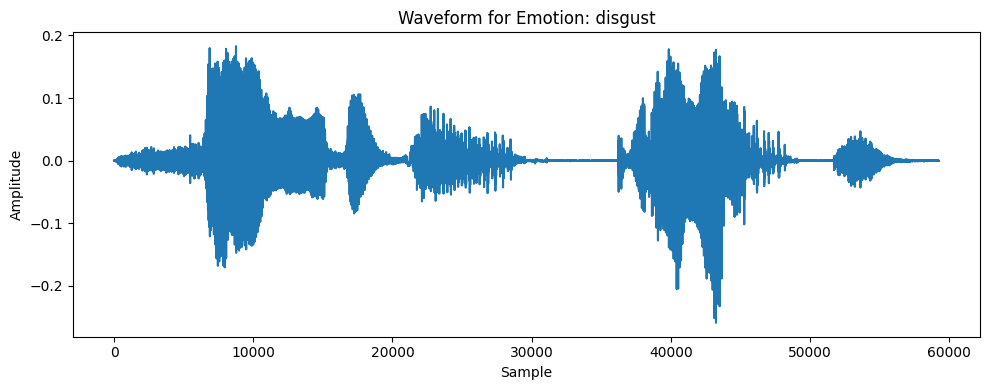

Emotion: disgust


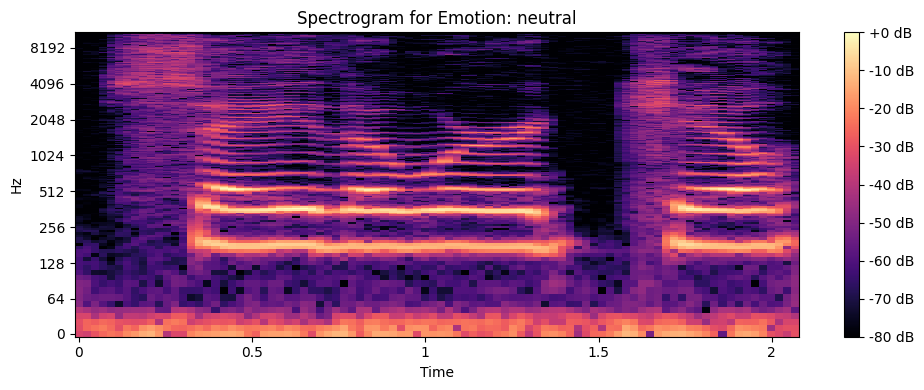

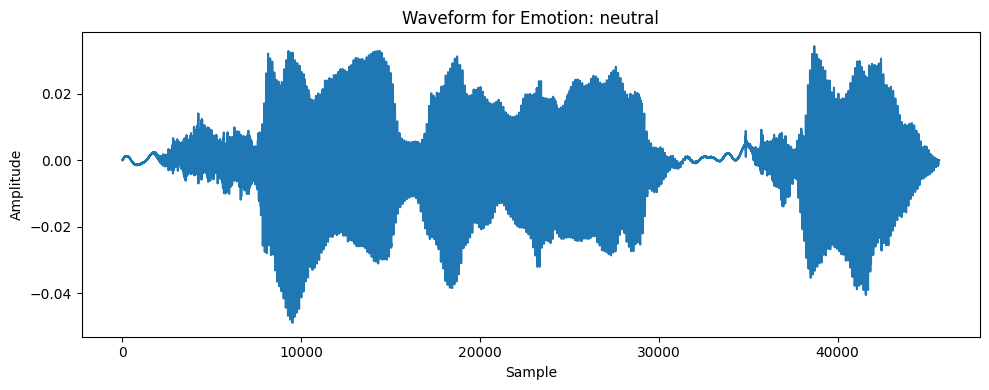

Emotion: neutral


In [49]:
df_sampling_rate = []

def process_audio(emotion, df):
    # Filter the DataFrame based on the emotion label
    paths = np.array(df["Speech"][df["label"] == emotion])
    random_index = np.random.choice(len(paths))  # Randomly select an index
    path = paths[random_index]

    data, sampling_rate = librosa.load(path)

    # Print sampling rate
    #print(f"Sampling Rate for {emotion} is {sampling_rate}")
    df_sampling_rate.append(f"Sampling Rate for {emotion} is {sampling_rate}")

    # Generate spectrogram
    plt.figure(figsize=(10, 4))
    spectrogram = librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(data), ref=np.max),
                                            sr=sampling_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram for Emotion: ' + emotion)
    plt.tight_layout()
    plt.show()

    # Generate waveform
    plt.figure(figsize=(10, 4))
    plt.plot(data)
    plt.title('Waveform for Emotion: ' + emotion)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

    # Play audio
    print(f"Emotion: {emotion}")
    display(Audio(data, rate=sampling_rate))

# Assuming Final_df is your DataFrame containing speech paths and labels
# Iterate over unique emotion labels
for emotion in Final_df["label"].unique():
    process_audio(emotion, Final_df)

#### Feature Extraction
**MFCC**

In [50]:
#we need to convert audio file to mfcc ie numeric formate
# another method is STFT ie short tearm fourier transform if mfcc fails then we can try using stft also
def audio_to_mfcc(audio_path, n_mfcc=40,n_fft=2048,hop_length=512):
  # Load audio file
  audio, sr = librosa.load(audio_path, sr=None)
  # Compute MFCCs
  mfcc_matrix = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

  return mfcc_matrix

In [51]:
# Assuming df contains your DataFrame with audio file paths
# Convert audio files to MFCCs
X_mfcc = []
for audio_path in Final_df['Speech']:
    mfcc = audio_to_mfcc(audio_path)
    X_mfcc.append(mfcc)


# Now X_mfcc is a list of MFCC matrices
# Pad or truncate the matrices to a fixed number of frames
max_frames = max(mfcc.shape[1] for mfcc in X_mfcc)
X_padded = np.array([np.pad(mfcc, ((0, 0), (0, max_frames - mfcc.shape[1])), mode='constant') for mfcc in X_mfcc])



In [52]:
max_frames = max(mfcc.shape[1] for mfcc in X_mfcc)
max_frames

284

In [53]:
X_mfcc

[array([[-6.73930054e+02, -5.89228333e+02, -5.19892822e+02, ...,
         -3.81763123e+02, -4.34545074e+02, -5.01985657e+02],
        [ 1.48365431e+01, -2.10004196e+01, -4.78236961e+01, ...,
          6.10315475e+01,  5.57632256e+01,  6.13321838e+01],
        [ 1.52855015e+01,  2.65805626e+01,  3.08795261e+01, ...,
          2.07491055e+01,  2.03309250e+01,  2.23126831e+01],
        ...,
        [ 7.48433650e-01,  8.63304794e-01,  5.18117046e+00, ...,
          6.00529909e+00,  5.75881958e+00, -6.26596391e-01],
        [ 6.23871982e-02,  1.90059173e+00,  2.85749197e+00, ...,
          1.17645283e+01,  1.83420792e+01,  7.40108871e+00],
        [ 2.44454932e+00,  1.37801623e+00, -1.99597311e+00, ...,
          6.62648010e+00,  1.32160816e+01,  4.11577463e+00]], dtype=float32),
 array([[-690.9987   , -585.5147   , -508.32993  , ..., -680.7492   ,
         -685.9634   , -694.91296  ],
        [  19.782745 ,  -10.212792 ,  -28.259132 , ...,   56.00209  ,
           50.992397 ,   43.068947 ]

In [54]:
X_padded.shape
#40 indicates the MFCC coefficients  which are been calculated over a 284 frames

(2800, 40, 284)

In [55]:
X = np.transpose(X_padded,(0,2,1))
X.shape

(2800, 284, 40)

In [56]:
le = LabelEncoder()
y = to_categorical(le.fit_transform(Final_df["label"]))
y.shape

(2800, 7)

In [57]:
Final_df.head()

,Speech,label
0,/content/TESS Toronto emotional speech set dat...,happy
1,/content/TESS Toronto emotional speech set dat...,surprise
2,/content/TESS Toronto emotional speech set dat...,fear
3,/content/TESS Toronto emotional speech set dat...,angry
4,/content/TESS Toronto emotional speech set dat...,fear


### Using Machine learning algo's (DT,RFC)

In [58]:
X_ml = X.reshape(X.shape[0],-1)
X_ml.shape

(2800, 11360)

In [59]:
#284*40 = 11360

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
X_train,X_test, y_train,y_test = train_test_split(X_ml,y,test_size=0.2,random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [61]:
from sklearn.metrics import accuracy_score
y_pred_rfc = rfc.predict(X_test)
acc = accuracy_score(y_test,y_pred_rfc)
print("Accuracy Score At Random Forest Classifier:",acc)

Accuracy Score At Random Forest Classifier: 0.9767857142857143


In [62]:
from sklearn.model_selection import cross_val_score,KFold

In [63]:
## lets try to implement cross val score to witness the acc is right or not
from sklearn.model_selection import cross_val_score,KFold
kflod = KFold(n_splits=5,shuffle=True,random_state=42)
cv_rfc = cross_val_score(rfc,X_ml,y,cv=kflod)
print("Cross validation Score: ",cv_rfc)
avg_acc = np.mean(cv_rfc)
print("Average Accuracy for Random Forest Classifier:",avg_acc)

Cross validation Score:  [0.98928571 0.96071429 0.95357143 0.95714286 0.96607143]
Average Accuracy for Random Forest Classifier: 0.965357142857143


In [64]:
y_test.shape,y_pred_rfc.shape

((560, 7), (560, 7))

In [65]:
#let's use confusion matrix to display

#confision matrix need 1D array
from sklearn.metrics import confusion_matrix
cf_rfc = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred_rfc,axis=1))

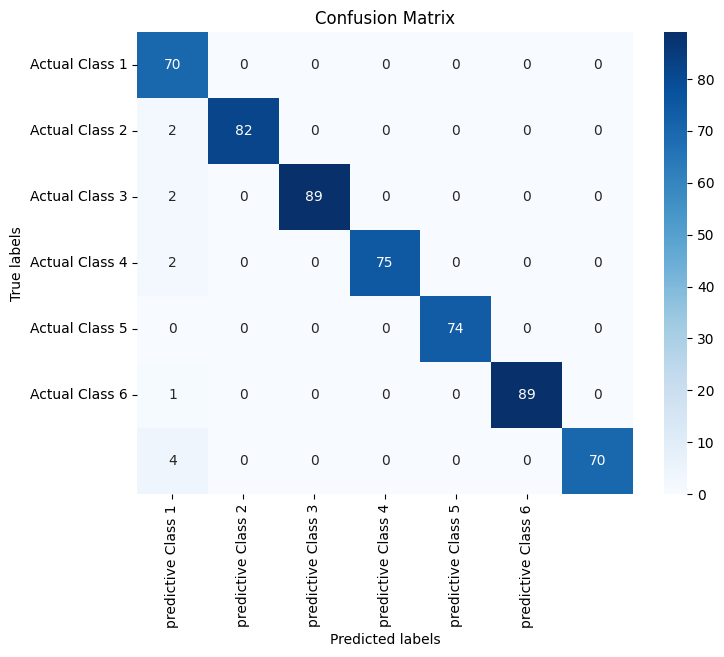

In [66]:
# Define labels for better visualization
labels_1 = ['predictive Class 1', 'predictive Class 2', 'predictive Class 3', 'predictive Class 4', 'predictive Class 5', 'predictive Class 6']
labels_2 = ["Actual Class 1","Actual Class 2","Actual Class 3","Actual Class 4","Actual Class 5","Actual Class 6"]
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cf_rfc, annot=True, fmt='d', cmap='Blues', xticklabels=labels_1, yticklabels=labels_2)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#### Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [68]:
y_pred_dt = dt.predict(X_test
                       )
acc_dt = accuracy_score(y_test,y_pred_dt)
print("Accuracy Score On Decision Tree:",acc_dt)

Accuracy Score On Decision Tree: 0.8964285714285715


In [69]:
kflod = KFold(n_splits=5,shuffle=True,random_state=42)
cv_dt = cross_val_score(dt,X_ml,y,cv=kflod)
print("Cross validation Score: ",cv_dt)
avg_acc_dt = np.mean(cv_dt)
print("Average Accuracy for Random Forest Classifier:",avg_acc_dt)

Cross validation Score:  [0.89821429 0.89642857 0.88214286 0.89285714 0.89107143]
Average Accuracy for Random Forest Classifier: 0.8921428571428571


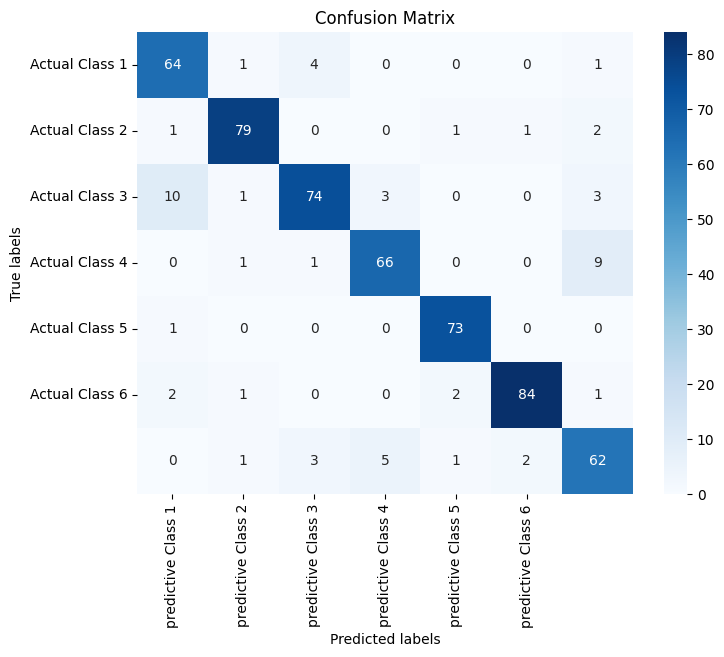

In [70]:
cf_dt = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred_dt,axis=1))
# Define labels for better visualization
labels_1 = ['predictive Class 1', 'predictive Class 2', 'predictive Class 3', 'predictive Class 4', 'predictive Class 5', 'predictive Class 6']
labels_2 = ["Actual Class 1","Actual Class 2","Actual Class 3","Actual Class 4","Actual Class 5","Actual Class 6"]
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cf_dt, annot=True, fmt='d', cmap='Blues', xticklabels=labels_1, yticklabels=labels_2)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Deep learning model

In [71]:
X.shape

(2800, 284, 40)

In [72]:
y.shape

(2800, 7)

In [73]:
X.dtype,y.dtype

(dtype('float32'), dtype('float32'))

In [74]:
X_train_d,X_test_d,y_train_d,y_test_d = train_test_split(X,y,test_size=0.2,random_state=42)

In [75]:
X_train_d.shape,X_test_d.shape,y_train_d.shape, y_test_d.shape

((2240, 284, 40), (560, 284, 40), (2240, 7), (560, 7))

In [76]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor="val_accuracy",
                   patience=10,
                   verbose=1,
                   restore_best_weights=True)

In [77]:
X_train_d.shape[1],X_train_d.shape[2]

(284, 40)

In [78]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation data shape:", X_val.shape)
print("Validation labels shape:", y_val.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (1120, 284, 40)
Training labels shape: (1120, 7)
Validation data shape: (1120, 284, 40)
Validation labels shape: (1120, 7)
Test data shape: (560, 284, 40)
Test labels shape: (560, 7)


In [79]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
#writing down the model now..!
model = Sequential()
model.add(Flatten(input_shape=(284, 40)))
#model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',kernel_regularizer =l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu',kernel_regularizer =l2(0.001)))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
#fitting the model here...
history = model.fit(X_train, y_train, epochs=60, batch_size=64, validation_data=(X_val, y_val), callbacks=[es])

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 11360)             0         
                                                                 
 dense (Dense)               (None, 128)               1454208   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 7)                 455       
                                                                 
Total params: 1462919 (5.58 MB)
Trainable params: 1462919 (5.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/60
18/18 [

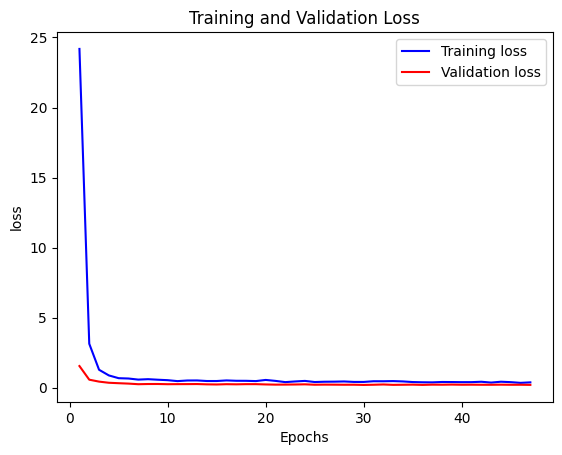

In [80]:
#let's plot the graph of loss and accuracy so we can interpret that the model is overfitting or not
# Extracting accuracy values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Plotting
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

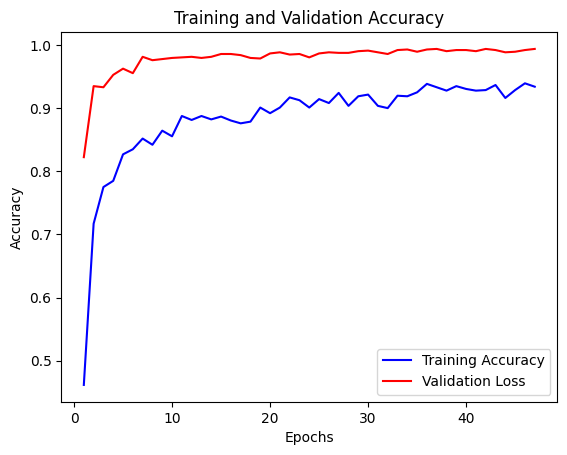

In [81]:
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs =range(1,len(train_acc)+1)
plt.plot(epochs,train_acc,"b",label="Training Accuracy")
plt.plot(epochs,val_acc,"r",label = "Validation Loss")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()